In [15]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

In [104]:
class Expand(object):
    def __init__(self, mean):
        self.mean = mean

    def __call__(self, image, boxes, labels):
#         if random.randint(2):
#             return image, boxes, labels

        height, width, depth = image.shape
        n = random.uniform(0.25, 1)
        ratio = 1/n
        print(ratio)
        left = random.uniform(0, width*ratio - width)
        top = random.uniform(0, height*ratio - height)

        expand_image = np.zeros(
            (int(height*ratio), int(width*ratio), depth),
            dtype=image.dtype)
        expand_image[:, :, :] = self.mean
        expand_image[int(top):int(top + height),
                     int(left):int(left + width)] = image
        image = expand_image

        boxes = boxes.copy()
        boxes[:, :2] += (int(left), int(top))
        boxes[:, 2:] += (int(left), int(top))
#         print('Expand_boxes : ', boxes)
        return image, ratio#, boxes, labels

In [ ]:
ex = Expand(0)

In [109]:
b= [1/random.uniform(0.25, 1) for i in range(1000)]

(array([303., 198., 141.,  96.,  58.,  49.,  46.,  44.,  37.,  28.]),
 array([1.00007064, 1.2984022 , 1.59673377, 1.89506533, 2.1933969 ,
        2.49172846, 2.79006003, 3.0883916 , 3.38672316, 3.68505473,
        3.98338629]),
 <BarContainer object of 10 artists>)

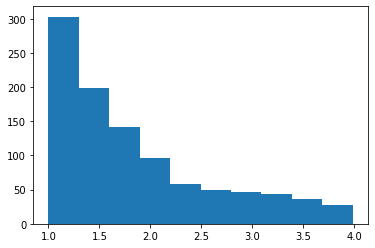

In [110]:
plt.hist(b)

In [91]:
ex = Expand(0)

In [92]:
boxes = np.array([[100, 100, 150, 150]])

In [93]:
image = np.ones([300 ,300, 2])

1.9373119323050405


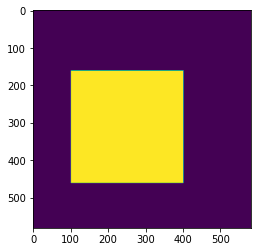

In [102]:
ex_image = ex(image, boxes, 1)
plt.imshow(ex_image[:,:,0])